# Import e funzioni ausiliarie

In [212]:
from tensorflow import keras as k
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [213]:
x = np.linspace(0,15,100)
y = np.sin(x)

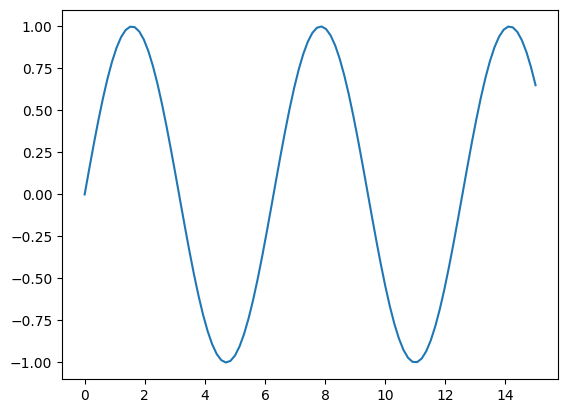

In [214]:
plt.plot(x,y)

In [215]:
def time_step(data, label, step=10):
    x,y = [],[]
    for i in range(data.shape[0]-(step+1)):
        x.append(data[i:i+step])
        y.append(label[i:i+step+1])
    return np.array(x),np.array(y)

In [216]:
xt,yt = time_step(x,y)
xt = xt.reshape(*xt.shape, 1)
yt = yt.reshape(*yt.shape, 1)

In [217]:
model = k.models.Sequential(
    [
        k.layers.LSTM(128, return_sequences=True),
        k.layers.Dense(250, activation="relu"),
        k.layers.Dense(100, activation="relu"),
        k.layers.Dense(100, activation="relu"),
        k.layers.Dense(100, activation="relu"),
        k.layers.Dense(1)
    ]
)

In [218]:
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(0.0001),
    metrics=['mse']
)
model(xt)
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (89, 10, 128)             66560     
                                                                 
 dense_310 (Dense)           (89, 10, 250)             32250     
                                                                 
 dense_311 (Dense)           (89, 10, 100)             25100     
                                                                 
 dense_312 (Dense)           (89, 10, 100)             10100     
                                                                 
 dense_313 (Dense)           (89, 10, 100)             10100     
                                                                 
 dense_314 (Dense)           (89, 10, 1)               101       
                                                                 
Total params: 144,211
Trainable params: 144,211
Non-t

In [219]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.fit(xt,yt,epochs=500, callbacks=[callback])

Epoch 1/500


ValueError: in user code:

    File "/Users/davidemolitierno/miniconda/envs/dlenv/lib/python3.8/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Users/davidemolitierno/miniconda/envs/dlenv/lib/python3.8/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/davidemolitierno/miniconda/envs/dlenv/lib/python3.8/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/davidemolitierno/miniconda/envs/dlenv/lib/python3.8/site-packages/keras/engine/training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/davidemolitierno/miniconda/envs/dlenv/lib/python3.8/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/Users/davidemolitierno/miniconda/envs/dlenv/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/davidemolitierno/miniconda/envs/dlenv/lib/python3.8/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/davidemolitierno/miniconda/envs/dlenv/lib/python3.8/site-packages/keras/losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/davidemolitierno/miniconda/envs/dlenv/lib/python3.8/site-packages/keras/losses.py", line 1486, in mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 10 and 11 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](sequential_18/dense_314/BiasAdd, IteratorGetNext:1)' with input shapes: [?,10,1], [?,11,1].


2022-11-23 20:44:31.409987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-23 20:44:31.536266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 48ms/step


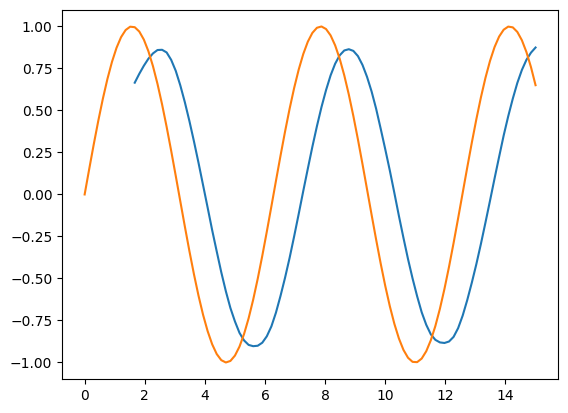

In [ ]:
predicted = model.predict(xt)
plt.plot(x[11:], predicted)
plt.plot(x,y)

2022-11-23 20:44:32.328964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-23 20:44:32.472711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 26ms/step


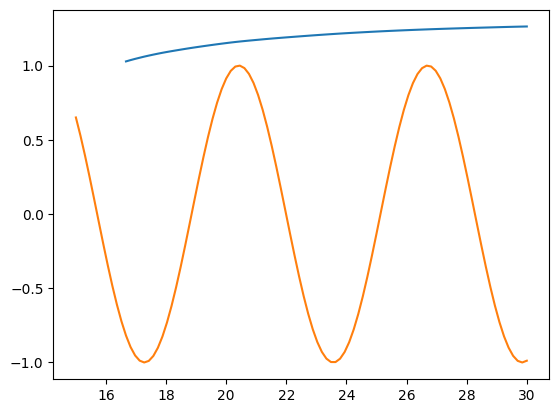

In [ ]:
x_test = np.linspace(15,30,100)
y_test = np.sin(x_test)
x_prova, y_prova = time_step(x_test,y_test)
x_prova = x_prova.reshape(*x_prova.shape, 1)
y_prova = y_prova.reshape(*y_prova.shape, 1)
model.evaluate(x_prova, y_prova)
predicted2 = model.predict(x_prova)
plt.plot(x_test[11:], predicted2)
plt.plot(x_test,y_test)
